# Step1: load data into jupyter

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [27]:
df=pd.read_excel('pima-data.xlsx')
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True


In [28]:
len(df)

768

# step2:clean data

### 2a-let us find if there are any null values

In [29]:
df.isnull().values.any()
 

False

###  let us find duplicate or co-related colums

In [30]:
# first check how many colums are there -->12

In [31]:
def plot_corr(df,size=12):
    corr = df.corr() #pandas data frame correlation function
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) #color code the rectangles by correlation values
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [32]:
#lets call above function

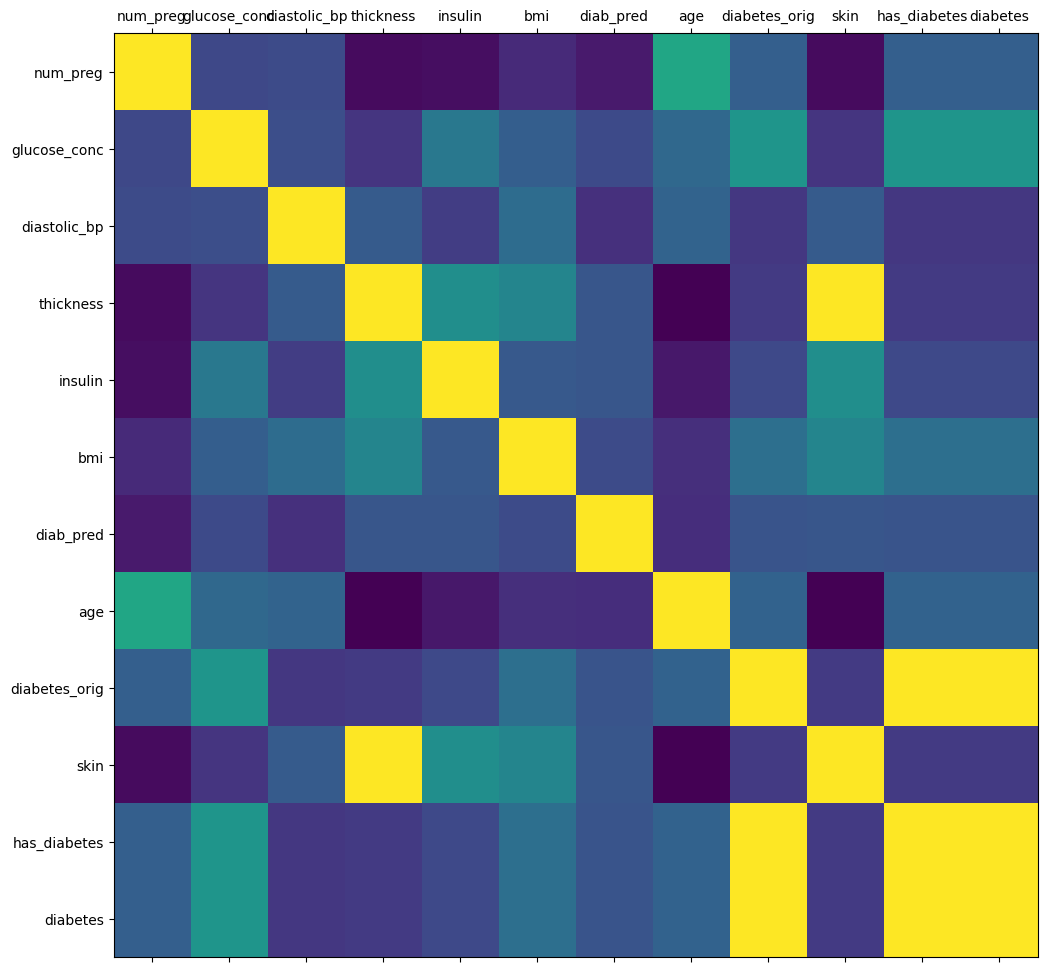

In [33]:
plot_corr(df)

In [34]:
#we are going to remove thickness,has_diabetics,diabetes_orig

In [35]:
del df['thickness']
del df['has_diabetes']
del df['diabetes_orig']

In [36]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


# 2c -lets convert numbers to text
### machine learning will not understand text.so convert to numbers

In [37]:
diabetes_map = {True:1, False:0}

In [38]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [39]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


# let us check propotions vs non diabetic propotions

# we need to ensure that the propotion should be balanced(50-50) diabets and  non diabets or atleast

In [40]:
num_true = len(df.loc[df['diabetes'] == True]) #loc returns no of items with g
num_false = len(df.loc[df['diabetes'] == False])
print('true = ', (num_true/ (num_true+num_false) )*100 ) #34% is decent figure
print('false = ', (num_false/ (num_true+num_false) )*100 ) #65% is decent figu


true =  34.89583333333333
false =  65.10416666666666


### incase of data inbalance  we use SMOTE Technique to increase lesser data samples

# step 3 -Train Test Split 

In [43]:
from sklearn.model_selection import train_test_split
feature_col_names = ['num_preg','glucose_conc', 'diastolic_bp',
                      'insulin',
                     'bmi','diab_pred','age']
predicted_class_names = ['diabetes']
x = df[feature_col_names].values 
y = df[predicted_class_names].values 
split_test_size = 0.20
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=split_test_size,
                                      random_state=42)

In [44]:
print('# rows in dataframe {0}'.format(len(df)))
print('# rows missing glucose_conc : {0}'.format(len(df.loc[df['glucose_conc']
== 0])))
print('# rows missing diastolic_bp : {0}'.format(len(df.loc[df['diastolic_bp']
== 0])))
print('# rows missing insulin : {0}'.format(len(df.loc[df['insulin']== 0])))
print('# rows missing bmi : {0}'.format(len(df.loc[df['bmi']== 0])))
print('# rows missing diab_pred : {0}'.format(len(df.loc[df['diab_pred']== 0
])))
print('# rows missing age : {0}'.format(len(df.loc[df['age']== 0])))

# rows in dataframe 768
# rows missing glucose_conc : 5
# rows missing diastolic_bp : 35
# rows missing insulin : 374
# rows missing bmi : 11
# rows missing diab_pred : 0
# rows missing age : 0


In [49]:
#Lets  fill  0’s  in th   valid	data (either mean or code)

In [60]:
from sklearn.impute import SimpleImputer
fill_0=	SimpleImputer(missing_values=np.nan, strategy='mean') 
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

In [62]:
x_train[0:10]

array([[1.000e+00, 9.500e+01, 6.000e+01, 5.800e+01, 2.390e+01, 2.600e-01,
        2.200e+01],
       [5.000e+00, 1.050e+02, 7.200e+01, 3.250e+02, 3.690e+01, 1.590e-01,
        2.800e+01],
       [0.000e+00, 1.350e+02, 6.800e+01, 2.500e+02, 4.230e+01, 3.650e-01,
        2.400e+01],
       [4.000e+00, 1.310e+02, 6.800e+01, 1.660e+02, 3.310e+01, 1.600e-01,
        2.800e+01],
       [1.000e+00, 1.030e+02, 3.000e+01, 8.300e+01, 4.330e+01, 1.830e-01,
        3.300e+01],
       [2.000e+00, 8.200e+01, 5.200e+01, 1.150e+02, 2.850e+01, 1.699e+00,
        2.500e+01],
       [3.000e+00, 1.280e+02, 7.800e+01, 0.000e+00, 2.110e+01, 2.680e-01,
        5.500e+01],
       [1.000e+00, 1.220e+02, 6.400e+01, 1.560e+02, 3.510e+01, 6.920e-01,
        3.000e+01],
       [0.000e+00, 1.380e+02, 0.000e+00, 0.000e+00, 3.630e+01, 9.330e-01,
        2.500e+01],
       [0.000e+00, 1.250e+02, 6.800e+01, 0.000e+00, 2.470e+01, 2.060e-01,
        2.100e+01]])

## Train the Model

In [50]:
from sklearn.naive_bayes import GaussianNB
#create gaussian naive bayes model object and train it with data
nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())

GaussianNB()

# Test the Model

In [70]:
nb_predict_test = nb_model.predict(x_test) 
from sklearn import metrics
print('accuracy	{0:.4f}'.format(metrics.accuracy_score(y_test,
nb_predict_test)))


accuracy	0.7489


# step 6 - ANALYZE THE MODEL ACCURACY



# WITH THE HELP OF "CONFUSION MATRIX" WE CAN ANALYZE ALGORITHMS PERFORMANCE

In [71]:
print('confusion matrix') 
print('{0}'.format(metrics.confusion_matrix(y_test, nb_predict_test))) 
print(' ')
print('classification report') 
print(metrics.classification_report(y_test, nb_predict_test))


confusion matrix
[[120  31]
 [ 27  53]]
 
classification report
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



##  Let us  try	random forest algorithm

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_model =	RandomForestClassifier(random_state=42) 
rf_model.fit(x_train, y_train.ravel())
rf_predict_test = rf_model.predict(x_test)
#training me try cs
print('accuracy	{0:.4f}'.format(metrics.accuracy_score(y_test,
rf_predict_test)))


accuracy	0.7576


# Let us see confusion matrix and classification report 

In [77]:
print(metrics.confusion_matrix(y_test, rf_predict_test)) 
print(' ')
print('classification report') 
print(metrics.classification_report(y_test, rf_predict_test))


[[124  27]
 [ 29  51]]
 
classification report
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       151
           1       0.65      0.64      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



#  Let  us  try	with Logistic regression algorithm

In [82]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(class_weight='balanced', C=0.2,
random_state = 42) #c is hyperpDrDneter
lr_model.fit(x_train, y_train.ravel()) 
lr_predict_test = lr_model.predict(x_test)

#training metrics
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, lr_predict_test))), 
print(' ')
print(metrics.confusion_matrix(y_test, lr_predict_test))
print(' ')
print('classification report') 
print(metrics.classification_report(y_test, lr_predict_test))


accuracy: 0.7056
 
[[108  43]
 [ 25  55]]
 
classification report
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.69      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.71       231



C:\Users\reema\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# final conclusion - we are suggesting  random forest algorithm for this project as the accuracy is 75oA  and recall value is 82oé	which is higher than other 2 algorithms (i.e naive byes and logistic regression aglorithm)